# Natural Language Processing Project

To classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. 

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

### Using NLP to help Yelp restaurants find their advantages and disadvantages and provide some suggestions about how to improve themselves. Also, the notebook realizes applying machine learning model of texts to predict stars.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\namkyu.im.CORP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Getting Data

In [2]:
yelp = pd.read_csv('C:/Users/namkyu.im/Documents/yelp.csv')

In [3]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
print(yelp.shape)
yelp.head()

(10000, 10)


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
stars,10000.0,3.7775,1.214636,1.0,3.0,4.0,5.0,5.0
cool,10000.0,0.8768,2.067861,0.0,0.0,0.0,1.0,77.0
useful,10000.0,1.4093,2.336647,0.0,0.0,1.0,2.0,76.0
funny,10000.0,0.7013,1.907942,0.0,0.0,0.0,1.0,57.0


## Create a new column called "text_length" which is a number of words in the text column

In [6]:
yelp['text_length'] = yelp['text'].apply(len)

In [7]:
yelp[['text','text_length']].head(10)

,text,text_length
0,My wife took me here on my birthday for breakf...,889
1,I have no idea why some people give bad review...,1345
2,love the gyro plate. Rice is so good and I als...,76
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",419
4,General Manager Scott Petello is a good egg!!!...,469
5,"Quiessence is, simply put, beautiful. Full wi...",2094
6,Drop what you're doing and drive here. After I...,1565
7,"Luckily, I didn't have to travel far to make m...",274
8,Definitely come for Happy hour! Prices are ama...,349
9,Nobuo shows his unique talents with everything...,186


# Exploration Data Analysis

### Remove unnecssary columns and rename variables

In [8]:
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'text_length'],
      dtype='object')

In [9]:
yelp.drop(['business_id','date','review_id','type', 'user_id'], axis=1, inplace = True)

In [10]:
yelp.head()

,stars,text,cool,useful,funny,text_length
0,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,5,I have no idea why some people give bad review...,0,0,0,1345
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469


In [11]:
yelp = yelp.rename(columns = {'stars':'Stars', 'text':'Text', 'useful':'Useful', 'cool':'Cool','funny':'Funny'})

In [12]:
yelp.head()

,Stars,Text,Cool,Useful,Funny,text_length
0,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,5,I have no idea why some people give bad review...,0,0,0,1345
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469


# Visualization

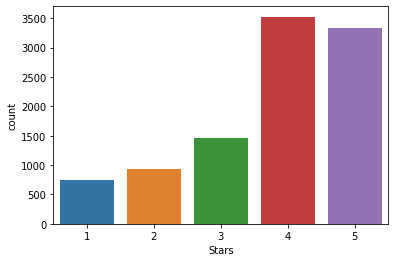

In [13]:
sns.countplot(x='Stars', data = yelp)

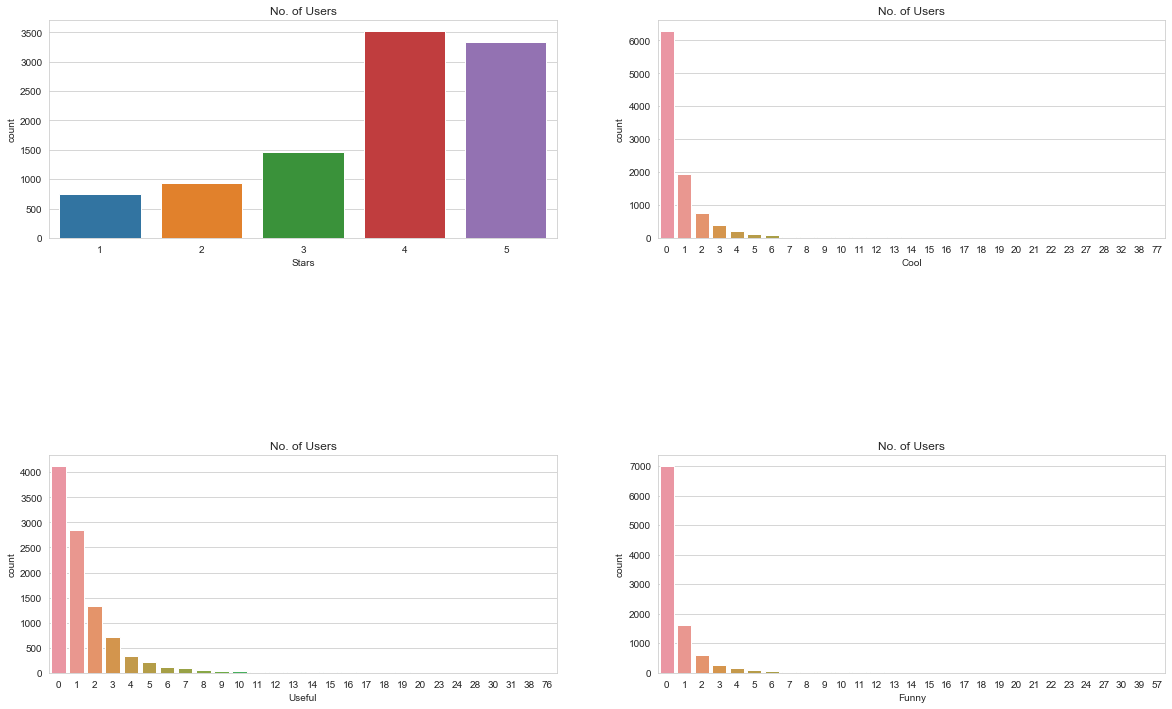

In [26]:
#subplots using seaborn
features=['Stars','Cool','Useful','Funny']
fig=plt.subplots(figsize=(20,20))
sns.set_style('whitegrid')
for i, j in enumerate(features):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = yelp)
#    plt.xticks(rotation=90)
    plt.title("No. of Users")

### create a 5 histogram of text lenght based off of the start ratings

Text(0.5, 1.0, 'Text Length Distribution')

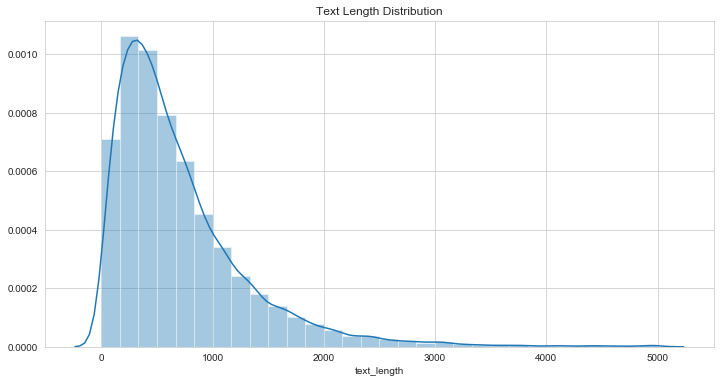

In [27]:
#Text Length
fig = plt.figure(figsize = (12,6))
sns.distplot(yelp['text_length'], kde = True, bins=30)
plt.title('Text Length Distribution')

<Figure size 1440x720 with 0 Axes>

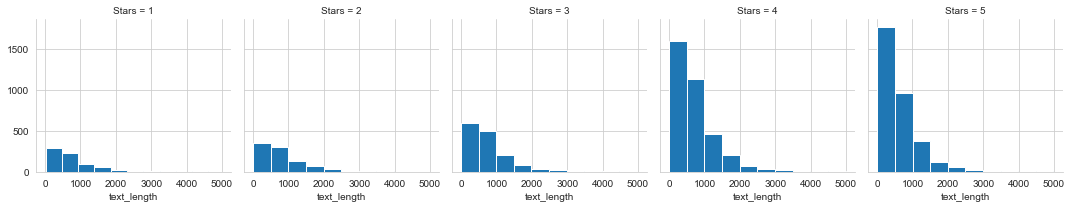

In [35]:
g = sns.FacetGrid(yelp,col = 'Stars')
g.map(plt.hist, 'text_length')

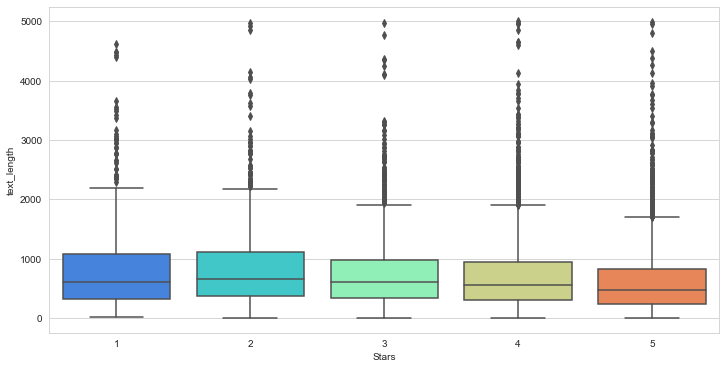

In [34]:
plt.figure(figsize = (12,6))
sns.boxplot(x='Stars', y='text_length', data = yelp, palette='rainbow')

Text(0.5, 1, 'Heatmap of Variables')

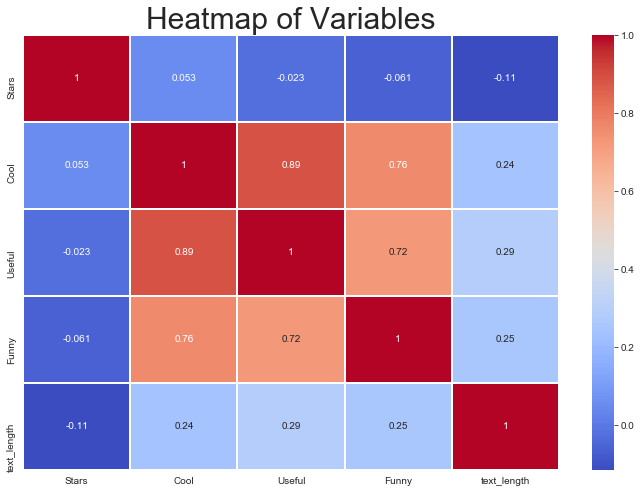

In [36]:
yelp_cor = yelp[['Stars', 'Cool','Useful','Funny','text_length']].corr()

fig = plt.figure(figsize =(12,8))
axes = sns.heatmap(yelp_cor, cmap = 'coolwarm', linewidth =1, linecolor ='white', annot = True)
axes.set_title('Heatmap of Variables', fontsize = 30)

### This shows stars doesn't have correlation with other variables. Use pairplot to check whether other variables can be used to distingish stars

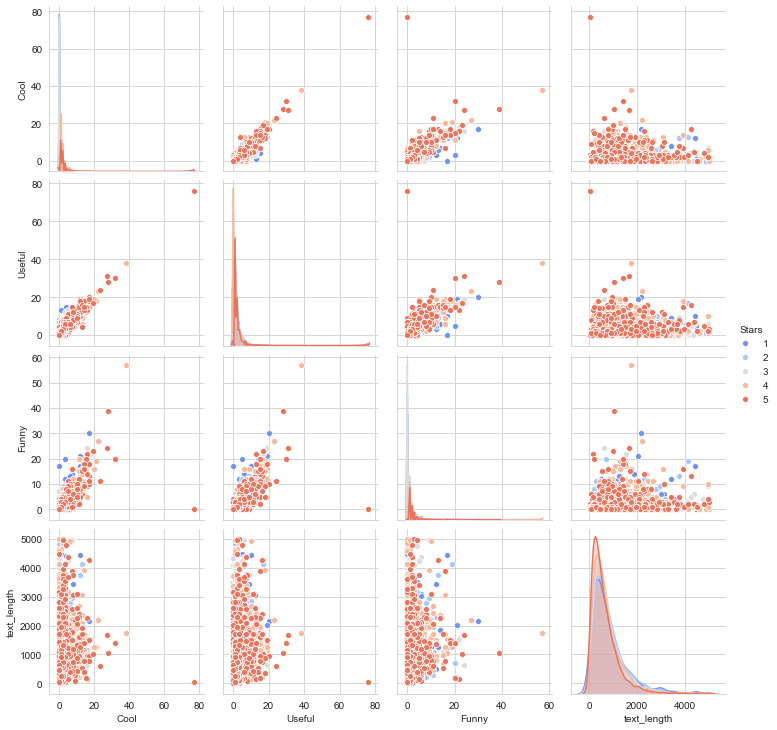

In [38]:
sns.pairplot(yelp, hue = 'Stars', palette='coolwarm')

### Text Analysis

remove all puncuations and stop words. Then we can get word frequency and make some preparations for further building up model

In [50]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\namkyu.im.CORP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
yelp_text = yelp[['Stars','Text']]
yelp_text.head()

,Stars,Text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


In [43]:
def remove_punc_stopword(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return a list of the cleaned text
    """
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]


# All Stars word frequency and word cloud

In [46]:
yelp_text_allstars = yelp_text.copy()


In [52]:
yelp_text_allstars['Text'] = yelp_text_allstars['Text'].apply(remove_punc_stopword)
yelp_text_allstars.count()

Stars    10000
Text     10000
dtype: int64

In [53]:
yelp_text_allstars.head()

,Stars,Text
0,5,"[wife, took, birthday, breakfast, excellent, w..."
1,5,"[idea, people, give, bad, reviews, place, goes..."
2,4,"[love, gyro, plate, rice, good, also, dig, can..."
3,5,"[rosie, dakota, love, chaparral, dog, park, co..."
4,5,"[general, manager, scott, petello, good, egg, ..."


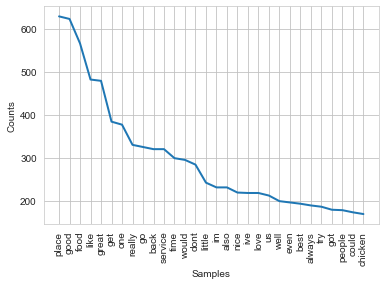

In [55]:
words_split=[]
for i in range(0,999):
    for word in yelp_text_allstars['Text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative= False)

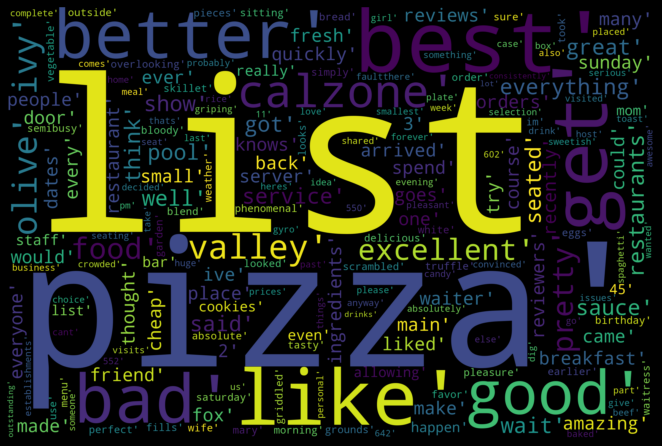

In [56]:
yelp_allstars_text = yelp_text_allstars['Text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_allstars_text))

fig = plt.figure(figsize =(12,6),
                facecolor = 'k',
                edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

### Star 1 and 5 words frequency and word cloud

In [58]:
yelp_text_stars1 = yelp_text[yelp_text['Stars']==1]
yelp_text_stars1['Text'] = yelp_text_stars1['Text'].apply(remove_punc_stopword)
yelp_text_stars1.count()

C:\Users\namkyu.im\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Stars    749
Text     749
dtype: int64

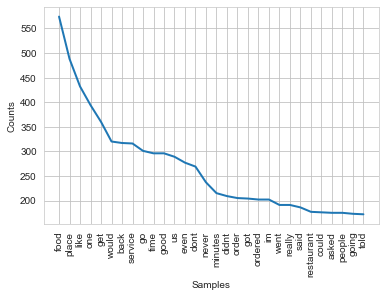

In [59]:
yelp_text_stars1 = yelp_text_stars1.reset_index(drop=True)
words_split = []
for i in range(0,749): 
    for word in yelp_text_stars1['Text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

In [88]:
words_split_df = pd.DataFrame(words_split, columns = ['words'])
words_split_df['words'].value_counts()

great         1990
place         1981
food          1661
good          1643
like          1264
              ... 
abused           1
bodyguards       1
rebuilding       1
eyecare          1
wade             1
Name: words, Length: 18779, dtype: int64

In [90]:
words_split_df.to_csv('words_split_df.csv', index= False)

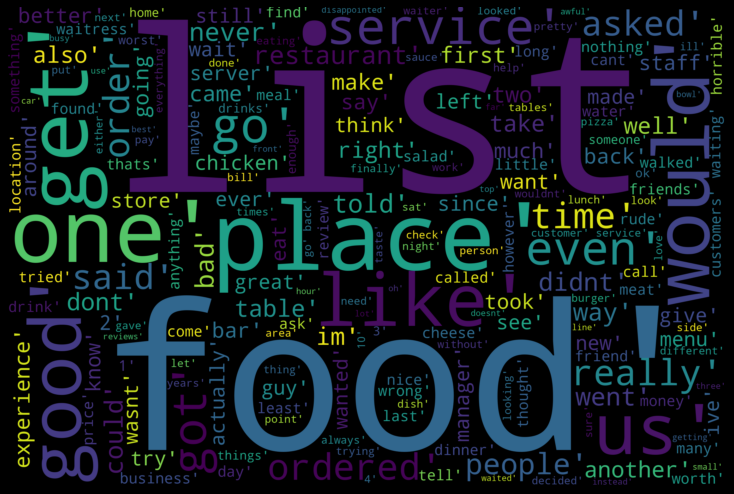

In [60]:
yelp_stars1_text = yelp_text_stars1['Text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_stars1_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [61]:
yelp_text_stars5 = yelp_text[yelp_text['Stars']==5]
yelp_text_stars5['Text'] = yelp_text_stars5['Text'].apply(remove_punc_stopword)
yelp_text_stars5.count()

C:\Users\namkyu.im\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Stars    3337
Text     3337
dtype: int64

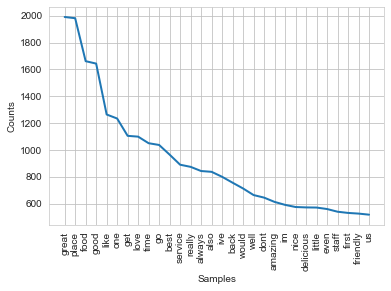

In [62]:
yelp_text_stars5 = yelp_text_stars5.reset_index(drop=True)
words_split = []
for i in range(0,3337): 
    for word in yelp_text_stars5['Text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

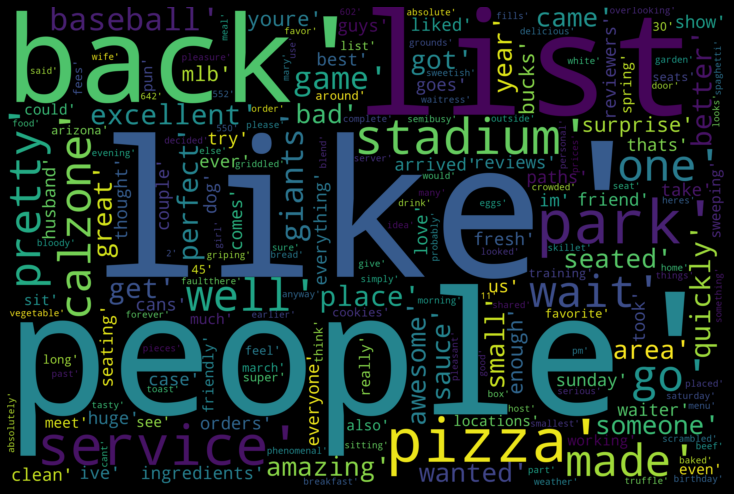

In [63]:
yelp_stars5_text = yelp_text_stars5['Text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_stars5_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

# Machine Learning Model

transfer those texts to vectors that can be used in machine learning model. What's more, let's first build up a machine learning model without using TF-IDF

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [93]:
X = yelp['Text']
y = yelp['Stars']
X = cv.fit_transform(X)

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import  TfidfTransformer

In [98]:
test_size = np.linspace(0.1, 1, num=9, endpoint=False)
random_state = np.arange(0, 43)
grid_results= []
for testsize in test_size:
    for randomstate in random_state:
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)
            mnb = MultinomialNB()
            mnb.fit(X_train, y_train)
            y_test_pred = mnb.predict(X_test)     
            grid_results.append([testsize, randomstate, mean_squared_error(y_test, y_test_pred)])
            grid_frame = pd.DataFrame(grid_results)
            grid_frame.rename(columns={0:'Test Size', 1:'Random State', 2:'MSE of Test'}, inplace=True)
        except Exception:
            print(Exception.with_traceback())
            print('error')
            continue

min_test_mse = grid_frame[grid_frame['MSE of Test'] == grid_frame['MSE of Test'].min()]
min_test_mse

,Test Size,Random State,MSE of Test
21,0.1,21,0.986


# Predictions

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 21)

In [100]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [101]:
predictions = mnb.predict(X_test)

In [102]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.76      0.51      0.61        69
           2       0.56      0.10      0.17        92
           3       0.25      0.13      0.17       137
           4       0.46      0.68      0.55       373
           5       0.60      0.56      0.58       329

    accuracy                           0.50      1000
   macro avg       0.53      0.40      0.42      1000
weighted avg       0.51      0.50      0.48      1000



### ML using TF-IDF

#### tf-idf weight is composed by two terms: 1. normalized Term Frequency (TF): # of times a word apperas in a document, measruing how frequenty a term occurs in document
        
    2) inverse document frequency (IDF), computed as the logarithm of the number of document in the corpus divivided by the number of documents where the speicfi term appears, mearuing how import a term is

In [104]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [106]:
tfidf_transformer = TfidfTransformer().fit(X)
X = tfidf_transformer.transform(X)

In [107]:
grid_results= []
for testsize in test_size:
    for randomstate in random_state:
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)
            mnb = MultinomialNB()
            mnb.fit(X_train, y_train)
            y_test_pred = mnb.predict(X_test)     
            grid_results.append([testsize, randomstate, mean_squared_error(y_test, y_test_pred)])
            grid_frame = pd.DataFrame(grid_results)
            grid_frame.rename(columns={0:'Test Size', 1:'Random State', 2:'MSE of Test'}, inplace=True)
        except Exception:
            print(Exception.with_traceback())
            print('error')
            continue

min_test_mse = grid_frame[grid_frame['MSE of Test'] == grid_frame['MSE of Test'].min()]
min_test_mse

,Test Size,Random State,MSE of Test
31,0.1,31,1.405


In [108]:
from sklearn.pipeline import Pipeline

In [109]:
pipeline = Pipeline([('bow', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())                    
                    ])

In [110]:
X=yelp['Text']
y=yelp['Stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [111]:
predictions = pipeline.predict(X_test)

In [112]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00        99
           3       0.00      0.00      0.00       144
           4       0.40      0.94      0.56       358
           5       0.78      0.35      0.48       338

    accuracy                           0.46      1000
   macro avg       0.24      0.26      0.21      1000
weighted avg       0.41      0.46      0.36      1000



C:\Users\namkyu.im\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Interpretation

#### Based on these two results, the more accurate results come form Star5 and Stars1 - the hightst star and lowest star.we can't
ignore the fact that TF-IDF actually does not improve the accuarcy in this case. It may work for other cases. We have to remove for Yelp reviews

# Modeling for Star1 and Star5

In [113]:
yelp_star1_star5 = yelp[(yelp.Stars == 1) | (yelp.Stars == 5)]

In [116]:
X= yelp_star1_star5['Text']
y= yelp_star1_star5['Stars']
cv = CountVectorizer()
X= cv.fit_transform(X)

In [117]:
test_size = np.linspace(0.1, 1, num=9, endpoint=False)
random_state = np.arange(0, 43)
grid_results= []
for testsize in test_size:
    for randomstate in random_state:
        try:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)
            mnb = MultinomialNB()
            mnb.fit(X_train, y_train)
            y_test_pred = mnb.predict(X_test)     
            grid_results.append([testsize, randomstate, mean_squared_error(y_test, y_test_pred)])
            grid_frame = pd.DataFrame(grid_results)
            grid_frame.rename(columns={0:'Test Size', 1:'Random State', 2:'MSE of Test'}, inplace=True)
        except Exception:
            print(Exception.with_traceback())
            print('error')
            continue

min_test_mse = grid_frame[grid_frame['MSE of Test'] == grid_frame['MSE of Test'].min()]
min_test_mse

,Test Size,Random State,MSE of Test
24,0.1,24,0.899756
36,0.1,36,0.899756


# Final Data Train & Prediction

In [118]:
pipeline = Pipeline([('bow', CountVectorizer()),
                     ('classifier', MultinomialNB())                    
                    ])

In [119]:
X= yelp_star1_star5['Text']
y= yelp_star1_star5['Stars']


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=36)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.88      0.69      0.77        67
           5       0.94      0.98      0.96       342

    accuracy                           0.93       409
   macro avg       0.91      0.83      0.87       409
weighted avg       0.93      0.93      0.93       409

